
TensorFlow version: 2.15.0
Training shape: (50000, 32, 32, 3)
Testing shape: (10000, 32, 32, 3)

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 flatten (Flatten)           (None, 3072)              0         
                                                                 
 dense (Dense)               (None, 512)               1573376   
                                                                 
 dense_1 (Dense)             (None, 256)               131328    
                                                                 
 dense_2 (Dense)             (None, 128)               32896     
                                                                 
 dense_3 (Dense)             (None, 10)                1290      
                                                                 
Total params: 1738890 (6.63 MB)
Trainable params: 1738890 (6.63 MB)
Non-trainable params: 

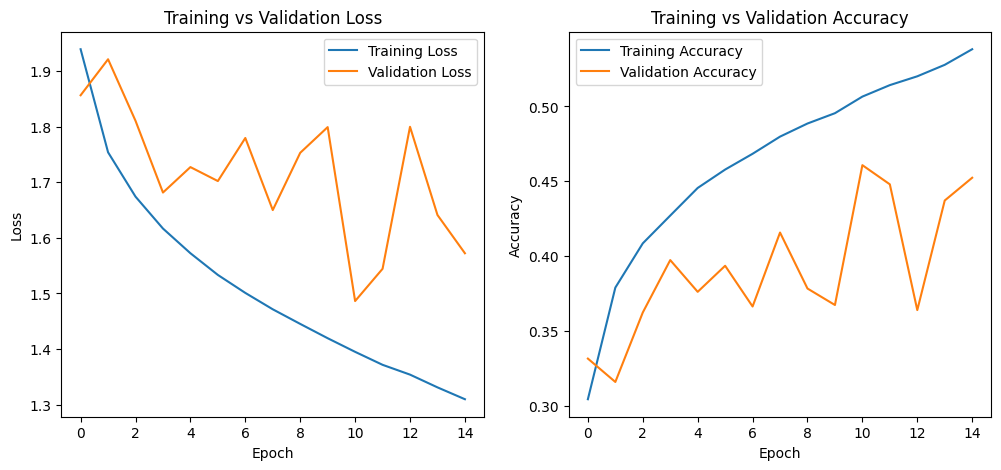

In [1]:
# --------------------------------------------------------
# 1. Import required packages
# --------------------------------------------------------
import pandas as pd
import numpy as np
import tensorflow as tf
import matplotlib.pyplot as plt

from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Flatten
from tensorflow.keras.optimizers import SGD

print("TensorFlow version:", tf.__version__)

# --------------------------------------------------------
# 2. Load CIFAR10 CSV files
# --------------------------------------------------------
train = pd.read_csv("C:/Users/UMESH/OneDrive/Desktop/LP_4/CIFR(Ass2&3)/train_data.csv")
test = pd.read_csv("C:/Users/UMESH/OneDrive/Desktop/LP_4/CIFR(Ass2&3)/test_data.csv")

# ------------------------------------
# Extract labels (first column)
# ------------------------------------
y_train = train.pop("label").values
y_test = test.pop("label").values

# ------------------------------------
# Extract pixel values (remaining columns)
# ------------------------------------
x_train = train.values
x_test = test.values

# --------------------------------------------------------
# 3. Reshape 3072 → 32×32×3 and normalize
# --------------------------------------------------------
x_train = x_train.reshape(-1, 32, 32, 3).astype("float32") / 255.0
x_test = x_test.reshape(-1, 32, 32, 3).astype("float32") / 255.0

print("Training shape:", x_train.shape)
print("Testing shape:", x_test.shape)

# --------------------------------------------------------
# 4. Build Feedforward Neural Network
# --------------------------------------------------------
model = Sequential([
    Flatten(input_shape=(32, 32, 3)),  # 3072 → dense input
    Dense(512, activation='relu'),
    Dense(256, activation='relu'),
    Dense(128, activation='relu'),
    Dense(10, activation='softmax')     # 10 classes
])

model.compile(
    optimizer=SGD(learning_rate=0.01),
    loss="sparse_categorical_crossentropy",
    metrics=["accuracy"]
)

model.summary()

# --------------------------------------------------------
# 5. Train the model
# --------------------------------------------------------
history = model.fit(
    x_train,
    y_train,
    epochs=15,
    batch_size=64,
    validation_split=0.1
)

# --------------------------------------------------------
# 6. Evaluate the model
# --------------------------------------------------------
loss, accuracy = model.evaluate(x_test, y_test)
print("✅ Test Loss:", loss)
print("✅ Test Accuracy:", accuracy)

# --------------------------------------------------------
# 7. Plot loss & accuracy
# --------------------------------------------------------
plt.figure(figsize=(12, 5))

# Loss plot
plt.subplot(1, 2, 1)
plt.plot(history.history["loss"], label="Training Loss")
plt.plot(history.history["val_loss"], label="Validation Loss")
plt.title("Training vs Validation Loss")
plt.xlabel("Epoch")
plt.ylabel("Loss")
plt.legend()

# Accuracy plot
plt.subplot(1, 2, 2)
plt.plot(history.history["accuracy"], label="Training Accuracy")
plt.plot(history.history["val_accuracy"], label="Validation Accuracy")
plt.title("Training vs Validation Accuracy")
plt.xlabel("Epoch")
plt.ylabel("Accuracy")
plt.legend()

plt.show()
